## 0. Setup

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scipy
import statsmodels.formula.api as smf
import random
from scipy.stats import iqr
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [2]:
df_salary = pd.read_csv('salary .csv')
df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### 1.1 Split your data into a training and test set.

In [3]:
#Splitting the data into the train and test set"
df_sample = df_salary.loc[:,['salary','yearsworked']]


train = np.random.rand(len(df_sample)) < 0.8
df_train = df_sample[train]
df_test = df_sample[~train]
'The length of the train sample is %s'% len(df_train)

'The length of the train sample is 416'

### 1.2 Examine the training data

In [4]:
#Rename as per metadata
df_salary =df_salary.rename(columns ={'male':'gender', 'experior':'Experience', 'yearsabs':'years_absent'})
df_salary.gender = ['male' if i == 1 else 'female' for i in df_salary.gender]
df_salary.position = ['Jnr_employee' if i == 1 else 'Manager' if  i == 2 else 'Executive' for i in df_salary.position]
df_salary.Field = ['Engineering' if i == 1 else 'Finance' if i == 2 else 'Human Resource' for i in df_salary.Field]    
df_salary.shape

(514, 11)

In [5]:
#$observing null values\n",
null_values= df_salary.isnull().sum()
null_values

salary          1
exprior         0
yearsworked     0
yearsrank       0
market          0
degree          0
otherqual       0
position        0
gender          0
Field           0
years_absent    0
dtype: int64

In [6]:
df_salary.dtypes

salary          float64
exprior           int64
yearsworked       int64
yearsrank         int64
market          float64
degree            int64
otherqual         int64
position         object
gender           object
Field            object
years_absent      int64
dtype: object

In [7]:
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
salary          513 non-null float64
exprior         514 non-null int64
yearsworked     514 non-null int64
yearsrank       514 non-null int64
market          514 non-null float64
degree          514 non-null int64
otherqual       514 non-null int64
position        514 non-null object
gender          514 non-null object
Field           514 non-null object
years_absent    514 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 44.3+ KB


In [8]:
# Number of unique values of column Gender
df_salary.gender.nunique()


2

In [9]:
# Unique values of column Gender
df_salary.gender.unique()

array(['male', 'female'], dtype=object)

In [10]:
df_salary.position.dtypes

dtype('O')

In [11]:
df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,years_absent
0,53000.0,0,0,0,1.17,1,0,Jnr_employee,male,Human Resource,0
1,58000.0,1,0,0,1.24,1,0,Jnr_employee,male,Finance,0
2,45500.0,0,0,0,1.21,1,0,Jnr_employee,male,Human Resource,2
3,35782.0,0,2,1,0.99,1,0,Jnr_employee,male,Human Resource,1
4,34731.0,0,2,2,0.91,1,0,Jnr_employee,male,Human Resource,1


Above is the sheet of *salaries earned by different employees in a company, the years worked, the years spent on the current rank, gender, qualifications and the positions* that these employees posess.
1. There are **514 entries/observation** in this dataset meaning that **514 employees'** data is recorded.
2. There is **one null value** in *Salary column*
3. The *gender* column contains **two unique values of type object: male or female**
4. The *Experience,years worked, years rank* columns contains **continuous values of type int*
5. *Market* column contains **continuous value of type float**
6. The *position* and *field* column contains **three unique values of type object(pandas string): {Jnr Employee, Executive or Manager} and {Human Resource, Finance or Engineering} respectively** 
   

### Examine the training data for Extreme Values

In [12]:
#Check for outliers:Train
q75_train, q25_train = np.percentile(df_train['salary'], [75 ,25])
iqr_train = q75_train - q25_train
lower_train_bound = q25_train - iqr_train*1.5
upper_train_bound = q75_train + iqr_train*1.5

In [13]:
upper_train_bound 

91062.375

In [14]:
df_train['Is_it_an_extreme'] = ['Yes' if i < lower_train_bound else 'Yes' if i > upper_train_bound else "No" for i in df_train.salary]

In [15]:
df_outliers = df_train[df_train.Is_it_an_extreme == 'Yes']
df_outliers

,salary,yearsworked,Is_it_an_extreme
280,91405.0,23,Yes
377,96156.0,12,Yes


#### Below is a summary statistics showing the statistics for every column in the data frame

In [16]:
df_salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,years_absent
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,118.000000


### 1.3 Histograms to show the distribution of the variables 

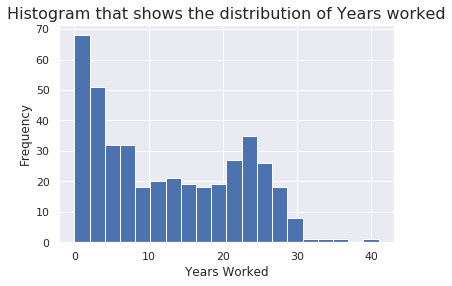

In [17]:
sns.set()

plt.hist(df_train.yearsworked, bins=20)

plt.title('Histogram that shows the distribution of Years worked', fontsize=16)
plt.xlabel('Years Worked')
plt.ylabel('Frequency')
plt.show()

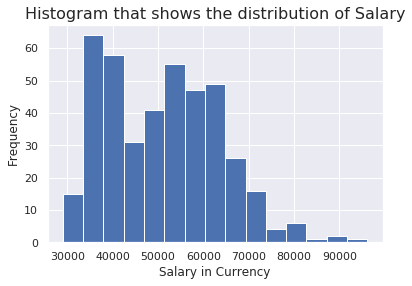

In [18]:
sns.set()
plt.hist(df_train.salary, bins = 15) 
plt.title('Histogram that shows the distribution of Salary', fontsize=16)
plt.xlabel('Salary in Currency')
plt.ylabel('Frequency')
plt.show()

### 1.4 Scatterplot showing the relationship between Years Worked and Salary

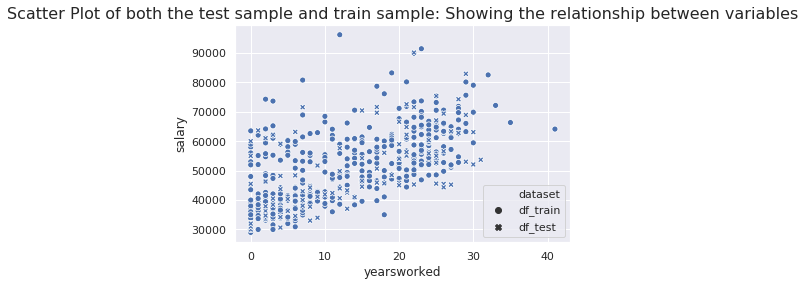

In [19]:
concatenated = pd.concat([df_train.assign(dataset='df_train'), df_test.assign(dataset='df_test')])
sns.set()
sns.scatterplot(x='yearsworked', y='salary', data=concatenated, style='dataset')
plt.title('Scatter Plot of both the test sample and train sample: Showing the relationship between variables', fontsize=16)
plt.show()

**Scatterplot of Train Sample showing the relationship between Years Worked and Salary**

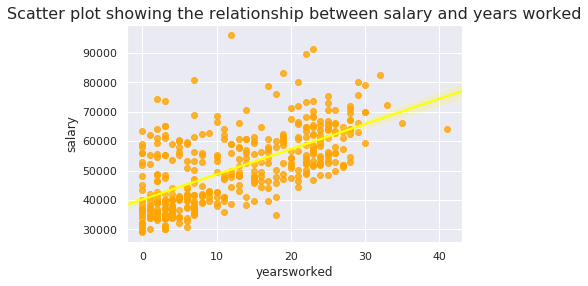

In [20]:
sns.set()
sns.regplot(x='yearsworked', y='salary', data=df_train, scatter_kws={"color": "orange"}, line_kws={"color": "Yellow"})
plt.title('Scatter plot showing the relationship between salary and years worked', fontsize=16)
plt.show()

### 2.  Using the statsmodels package and the training data, run a simple linear regression for Salary

In [21]:
import statsmodels.formula.api as smf

# create a fitted model in one line
model = smf.ols(formula='salary ~ yearsworked', data=df_train).fit()
# print the coefficients
model.params

Intercept      40106.702142
yearsworked      857.200896
dtype: float64

**A 1 year increase in time worked results in years worked coefficient "unit" increase in Salary.**

In [22]:

df_train['salary']=df_train.fillna(0)
coeffs = scipy.pearsonr(df_train.salary,df_train.yearsworked)
coeffs


(0.639633617245506, 3.0507451327181757e-49)

### 2.1 Does the model significantly predict the dependent variable

**R > 0.6** Means there is a positive correlation between the variables

**R > 0.6** A moderate positive relationship

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.

The **p_value** is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the *threshold* of the *P_value* of **p= 0.05**.

### 2.2 What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

In [23]:
#R^2 

coeffs[0]**2
print(round(coeffs[0],2)**2, ' Shows that ',(round(coeffs[0],2)**2)*100,'% of the data fits the model. Also, R_squared is known as a coefficient of determination' )

0.4096  Shows that  40.96 % of the data fits the model. Also, R_squared is known as a coefficient of determination


This means only over 35% in employees’ salaries is accounted for by the number of years they have worked

### 3. What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary

**R > 0.6** A moderate positive relationship

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 than it is to 0 which shows a moderate positive relationship between the two variables.



### 4. Meaning of a confidence interval
A 95% confidence interval of the mean is a range with an upper and lower number calculated from a sample. Because the true population mean is unknown, this range describes possible values that the mean could be. If multiple samples were drawn from the same population and a 95% CI calculated for each sample, we would expect the population mean to be found within 95% of these intervals. CIs are sensitive to variability in the population (spread of values) and sample size. When used to compare the means of two or more treatment groups, a CI shows the magnitude of a difference between groups. This is helpful in understanding the statistical significance in Statistcs.

In [24]:
# print the confidence intervals for the model coefficients
model.conf_int()

,0,1
Intercept,38540.114406,41673.289879
yearsworked,757.679539,956.722253


**From this, we can deduce that the true mean value of the salary population, will between intercept[0] and intercept[1].**

**This is a common shorthand for the idea that the calculations “work” 95% of the time. Only 5 % will this be not the case.**

### 5. Calculate the expected salary for someone with 12 years’ work experience.

In [25]:
#Estimating a person that worked for 12 years

x = pd.DataFrame({'yearsworked':[12]})
x

,yearsworked
0,12


In [26]:
model.predict(x)

0    50393.112896
dtype: float64

As per the model, it predicts that person who has worked for 12 years will earn, on average, the salary above. This value is interesting because the salary is not far off from the mean. This is because the mean for years worked is just over 12 years, meaning, on average, an employee at this company is to be expected to have worked for 12 years.

### 6. Calculate the expected salary for someone with 80 years’ work experience. 

In [27]:
y = pd.DataFrame({'yearsworked':[80]})
y

,yearsworked
0,80


In [28]:
model.predict(y)

0    108682.773831
dtype: float64

In [29]:
f'Maximum years worked(in numbers) %s' %df_salary.yearsworked.max()

'Maximum years worked(in numbers) 41'

### 6.1 Are there any problems with the above prediction? 
Yes, the model predicts the salary level that is bigger than the maximum salary in the data set. The model assumes that people can work indefinetly and hence the prediction, in reality, rarely does a person spend 80 years in the workforce. Even in the data set the person who have worked longer than the rest only worked for 41 years.

### Ensuring consistency in the models

In [30]:
# create a DataFrame with the minimum and maximum values years worked
X_new = pd.DataFrame({'yearsworked': [df_train.yearsworked.min(), df_train.yearsworked.max()]})
X_new.head()


,yearsworked
0,0
1,41


In [31]:

# make predictions for those x values and store them
preds = model.predict(X_new)
preds

0    40106.702142
1    75251.938883
dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


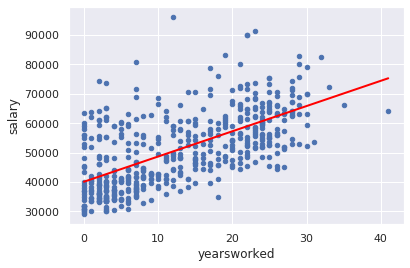

In [32]:
# first, plot the observed data
df_salary.plot(kind='scatter', x='yearsworked', y='salary')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()

In [33]:
model.pvalues

Intercept      1.570362e-178
yearsworked     3.050745e-49
dtype: float64

In [34]:
model.rsquared

0.4091311643105705

### 7. What other employee characteristics might influence their salary

In [35]:
df_salary.degree.value_counts()

1    496
0     18
Name: degree, dtype: int64

In [36]:
df_salary.otherqual.value_counts()

0    491
1     23
Name: otherqual, dtype: int64

The above values shows the people who have a degree and those who dont. The second cell shows the number of people who have any kind of other qualification. From this we can see that those with no degree anf those with other qualifications, aren't that many and thus not significant enough to influence the salary. So they can be ignored in this regard

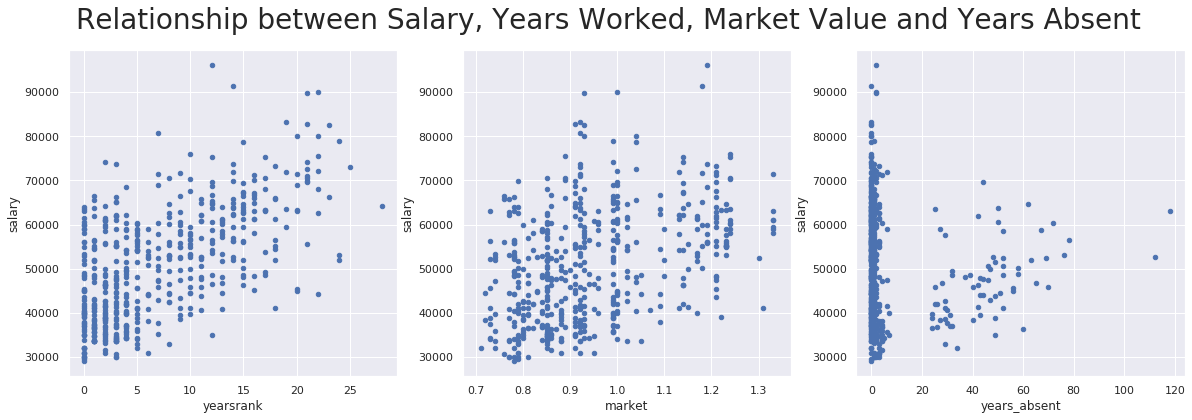

In [37]:
# Reducing the level of the axis logger to error:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

fig, axs = plt.subplots(1, 3, sharey=False)
fig.suptitle('Relationship between Salary, Years Worked, Market Value and Years Absent', fontsize=28)
df_salary.plot(kind='scatter', x='yearsrank', y='salary', ax=axs[0], figsize=(20, 6))
df_salary.plot(kind='scatter', x='market', y='salary', ax=axs[1])   
df_salary.plot(kind='scatter', x='years_absent', y='salary', ax=axs[2])

plt.show()

### Interpreting the influence of rank on salary

In [38]:
df_salary['salary']=df_salary.fillna(0)
coeffs_rank = scipy.pearsonr(df_salary.salary,df_salary.yearsrank)
coeffs_rank

(0.5976918776305726, 4.269494251043935e-51)

**R = .9999999999999997** Means there is a positive correlation between the variables

**R = 0.9999999999999997**  A strong positive relationship

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 1 showing a strong positive relationship between the two variables.

Just like with the relationship of years worked and salary, the **p_value** is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the threshold of the P_value of **p= 0.05**.


### Interpreting the influence of market on salary

In [39]:
coeffs_market = scipy.pearsonr(df_salary.salary,df_salary.market)
coeffs_market

(0.4019279970005203, 2.2352957169581516e-21)

**R = .21249348923247746** Means there is a positive correlation between the variables

**R = .21249348923247746** A weak positive relationship

The correlation coefficient suggest that the data follows a linear relationship and it is normally distributed. The correlation coefficient is closer to 0 showing a weak positive relationship between the two variables.

Just like with others, the **p_value** is too small and indicates strong evidence against the null hypothesis that the relationship between the variables is statistically significant since it is smaller than the threshold of the P_value of **p= 0.05**.

In [40]:
df_salary.years_absent.max()

118

### Interpreting the influence of years absent on salary

In [41]:
df_salary['salary']=df_salary.fillna(0)
coeffs_yrs = scipy.pearsonr(df_salary.salary,df_salary.years_absent)
coeffs_yrs

(-0.06582427557040559, 0.13613935757465626)

A negative correlation is a relationship between two variables that move in opposite directions. As years of absentism increase, the salary level decreases which is very logical, the less you work, the less you earn. The p_value is big enough and suggests strong evidence against the alternative hypothesis and have to accept the null hypothesis and conclude that the relationship between the variables is not statistically significant.

### Interpreting the influence of position on salary

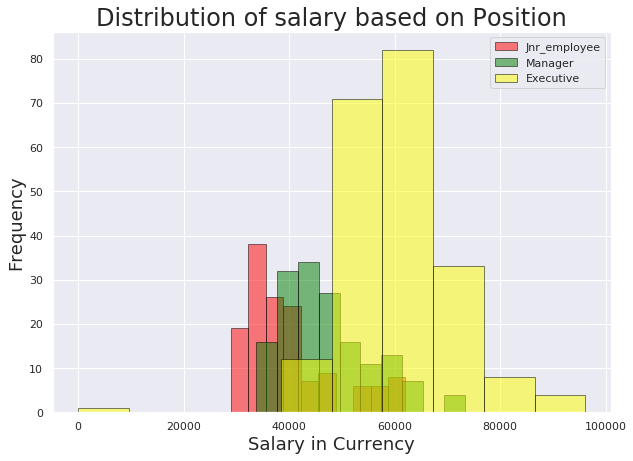

In [42]:
df_salary[df_salary['position']=='Jnr_employee'].salary.plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))
df_salary[df_salary['position']=='Manager'].salary.plot(kind='hist',color='green',edgecolor='black',alpha=0.5,figsize=(10,7))
df_salary[df_salary['position']=='Executive'].salary.plot(kind='hist',color='yellow',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Jnr_employee','Manager','Executive'])
plt.title('Distribution of salary based on Position', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

The above graph suggest that, the higher your rank(ranked from Jnr employee, Manager then Executive) the higher the salary. So yes, the rank does influence earnings.

### Interpreting the influence of Field on salary

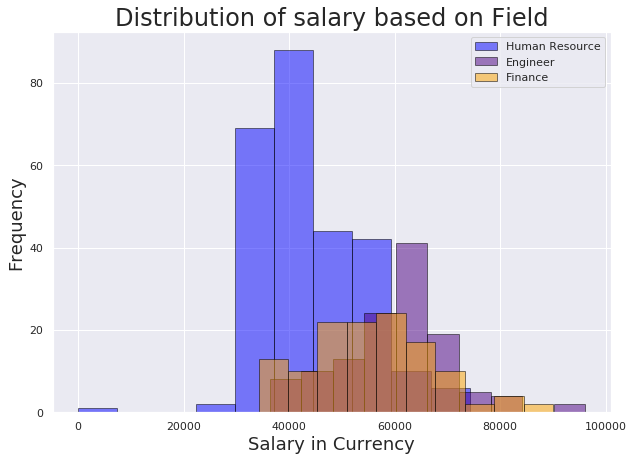

In [43]:
df_salary[df_salary['Field']=='Human Resource'].salary.plot(kind='hist',color='blue',edgecolor='black',alpha=0.5,figsize=(10,7))
df_salary[df_salary['Field']=='Engineering'].salary.plot(kind='hist',color='indigo',edgecolor='black',alpha=0.5,figsize=(10,7))
df_salary[df_salary['Field']=='Finance'].salary.plot(kind='hist',color='orange',edgecolor='black',alpha=0.5,figsize=(10,7))
plt.legend(labels=['Human Resource','Engineer','Finance'])
plt.title('Distribution of salary based on Field', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

This graph shows that one field seems to earn less than the rest. The majority of these employees are in the HR Department and they earn less than the rest in the other two. People in the Engineering field tend to earn more than the rest followed by those in finance.

### Interpreting the influence of gender on salary

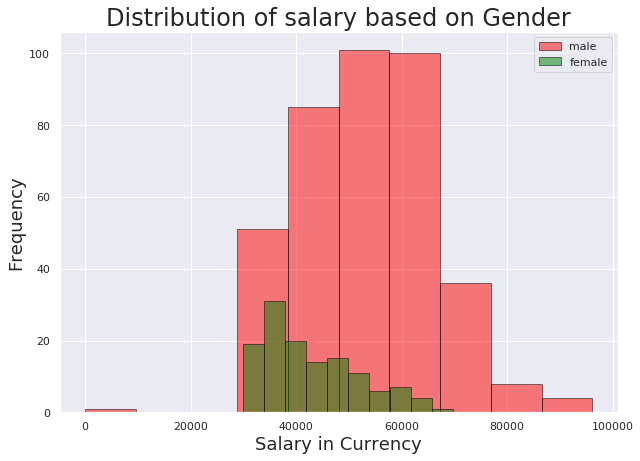

In [44]:
df_salary[df_salary['gender']=='male'].salary.plot(kind='hist',color='red',edgecolor='black',alpha=0.5,figsize=(10,7))
df_salary[df_salary['gender']=='female'].salary.plot(kind='hist',color='green',edgecolor='black',alpha=0.5,figsize=(10,7))

plt.legend(labels=['male','female'])
plt.title('Distribution of salary based on Gender', size=24)
plt.xlabel('Salary in Currency', size=18)
plt.ylabel('Frequency', size=18);

Most employees are ofmale gender, males earn more than females on average, this could explain the biasness of this data.

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     286.7
Date:                Wed, 12 Feb 2020   Prob (F-statistic):           3.05e-49
Time:                        14:26:23   Log-Likelihood:                -4408.3
No. Observations:                 416   AIC:                             8821.
Df Residuals:                     414   BIC:                             8829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.011e+04    796.957     50.325      0.000    3.85e+04    4.17e+04
yearsworked   857.2009     50.629     16.931      0.000     757.680     956.722
==============================================================================
Omnibus:                       78.613   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.633
Skew:                           1.128   Prob(JB):                     7.09e-29
Kurtosis:                       4.544   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### To be continued
